In [1]:
from astroplan import Observer
from astropy import units as u # shortcut
from astropy.utils import iers
from astroplan import FixedTarget
from astropy.time import Time
from astroplan.plots import plot_airmass 
import matplotlib.pyplot as plt 
from astroplan.plots import plot_finder_image
from astroplan.plots import plot_sky
import matplotlib.pyplot as pl 
from astropy.io import fits
import numpy as np


In [2]:
import os

DIR_PATH = '/System/Volumes/Data/Users/zeinakellybenton/obs_tech'

for subdir, dirs, files in os.walk(DIR_PATH ):
    if subdir.endswith('-lab3'):
        print(subdir)  


/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Jupiter-lab3
/System/Volumes/Data/Users/zeinakellybenton/obs_tech/M42-lab3
/System/Volumes/Data/Users/zeinakellybenton/obs_tech/M45-lab3
/System/Volumes/Data/Users/zeinakellybenton/obs_tech/M44-lab3
/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Capella-infocus-lab3
/System/Volumes/Data/Users/zeinakellybenton/obs_tech/flat-lab3
/System/Volumes/Data/Users/zeinakellybenton/obs_tech/darks-lab3
/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Capella-outfocus-lab3
/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Mars-lab3
/System/Volumes/Data/Users/zeinakellybenton/obs_tech/bias-lab3
/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Capella-lab3


The code above shows I have created folders for each section of file data. For example, Jupiter-lab3 has all B,V,I, and R (if asked for). Each 'object'-lab3 titled folder has the objects filter color frames. The flat, bias, and darks folder has only flat, bias, and darks information.

In [3]:
jupiter_path = '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Jupiter-lab3'

files_in_jupiter = os.listdir(jupiter_path)

for fileJ in files_in_jupiter:
    print(fileJ)


Light_darks_0.01sec_Bin2_filter-Clear_-4.9C_gain0_2025-02-17_203810_frame0001.fit
Light_darks_0.01sec_Bin2_filter-B_-4.9C_gain0_2025-02-17_203813_frame0001.fit
Light_darks_0.01sec_Bin2_filter-Clear_-4.9C_gain0_2025-02-17_203810_frame0002.fit
Light_darks_0.01sec_Bin2_filter-B_-4.9C_gain0_2025-02-17_203814_frame0003.fit
Light_darks_0.01sec_Bin2_filter-B_-4.9C_gain0_2025-02-17_203814_frame0002.fit
Light_darks_0.01sec_Bin2_filter-R_-4.9C_gain0_2025-02-17_203821_frame0002.fit
Light_darks_0.01sec_Bin2_filter-R_-4.9C_gain0_2025-02-17_203821_frame0001.fit
Light_darks_0.01sec_Bin2_filter-V_-4.9C_gain0_2025-02-17_203817_frame0001.fit
Light_darks_0.01sec_Bin2_filter-R_-4.9C_gain0_2025-02-17_203822_frame0003.fit
Dark_darks_0.01sec_Bin2_filter-I_-4.9C_gain0_2025-02-17_203825_frame0001.fit
Dark_darks_0.01sec_Bin2_filter-I_-4.9C_gain0_2025-02-17_203825_frame0002.fit
Dark_darks_0.01sec_Bin2_filter-I_-4.9C_gain0_2025-02-17_203826_frame0003.fit
.ipynb_checkpoints
Light_darks_0.01sec_Bin2_filter-V_-4.9C_

Above, you can see the Jupiter-lab3 folder opened and shows what I said. It has all B/V/I/R data frames. Each object titled folder is the same. Below I will prove that again with another one opened (i.e. Capella folder). The bias, darks, and flats will be called at the end of this code (and shown).

In [4]:
M42_path = '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/M42-lab3'

files_in_M42 = os.listdir(M42_path)

for file in files_in_M42:
    print(file)


Light_darks_20sec_Bin2_filter-B_-5.3C_gain0_2025-02-17_202821_frame0003.fit
Dark_darks_20sec_Bin2_filter-I_-5.3C_gain0_2025-02-17_203338_frame0002.fit
Light_darks_20sec_Bin2_filter-R_-4.9C_gain0_2025-02-17_203051_frame0001.fit
Light_darks_20sec_Bin2_filter-R_-4.9C_gain0_2025-02-17_203112_frame0002.fit
Light_darks_20sec_Bin2_filter-V_-5.3C_gain0_2025-02-17_203003_frame0003.fit
Dark_darks_20sec_Bin2_filter-I_-5.3C_gain0_2025-02-17_203359_frame0003.fit
Light_darks_20sec_Bin2_filter-B_-5.3C_gain0_2025-02-17_202800_frame0002.fit
.ipynb_checkpoints
Light_darks_20sec_Bin2_filter-V_-4.9C_gain0_2025-02-17_202942_frame0002.fit
Dark_darks_20sec_Bin2_filter-I_-4.9C_gain0_2025-02-17_203318_frame0001.fit
Light_darks_20sec_Bin2_filter-R_-5.3C_gain0_2025-02-17_203132_frame0003.fit
Light_darks_20sec_Bin2_filter-V_-4.9C_gain0_2025-02-17_202922_frame0001.fit
Light_darks_20sec_Bin2_filter-B_-5.3C_gain0_2025-02-17_202740_frame0001.fit


In [5]:
capella_path = '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Capella-lab3'

files_in_capella = os.listdir(capella_path)

for filec in files_in_capella:
    print(filec)

Light_darks_1sec_Bin2_filter-I_-4.9C_gain0_2025-02-17_194052_frame0001.fit
Light_darks_1sec_Bin2_filter-I_-4.9C_gain0_2025-02-17_194045_frame0001.fit
Light_darks_1sec_Bin2_filter-V_-4.9C_gain0_2025-02-17_194040_frame0002.fit
Light_darks_1sec_Bin2_filter-B_-4.9C_gain0_2025-02-17_194033_frame0002.fit
Light_darks_1sec_Bin2_filter-I_-4.9C_gain0_2025-02-17_194048_frame0003.fit
Light_darks_1sec_Bin2_filter-B_-4.9C_gain0_2025-02-17_194034_frame0003.fit
Light_darks_1sec_Bin2_filter-B_-4.9C_gain0_2025-02-17_194031_frame0001.fit
Light_darks_1sec_Bin2_filter-V_-4.9C_gain0_2025-02-17_194038_frame0001.fit
.ipynb_checkpoints
Light_darks_1sec_Bin2_filter-I_-4.9C_gain0_2025-02-17_194047_frame0002.fit
Light_darks_1sec_Bin2_filter-V_-4.9C_gain0_2025-02-17_194041_frame0003.fit


In [6]:
M44_path = '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/M44-lab3'

files_in_M44 = os.listdir(M44_path)

for file4 in files_in_M44:
    print(file4)


Dark_darks_10sec_Bin2_filter-I_-4.9C_gain0_2025-02-17_210220_frame0003.fit
Dark_darks_10sec_Bin2_filter-I_-4.9C_gain0_2025-02-17_210158_frame0001.fit
Dark_darks_10sec_Bin2_filter-I_-4.9C_gain0_2025-02-17_210209_frame0002.fit
Light_darks_10sec_Bin2_filter-V_-4.9C_gain0_2025-02-17_205937_frame0002.fit
Light_darks_10sec_Bin2_filter-Clear_-5.3C_gain0_2025-02-17_205747_frame0003.fit
Light_darks_10sec_Bin2_filter-B_-5.3C_gain0_2025-02-17_205821_frame0003.fit
Light_darks_10sec_Bin2_filter-R_-5.3C_gain0_2025-02-17_210011_frame0002.fit
Light_darks_10sec_Bin2_filter-V_-4.9C_gain0_2025-02-17_205926_frame0001.fit
Light_darks_10sec_Bin2_filter-R_-5.3C_gain0_2025-02-17_210001_frame0001.fit
.ipynb_checkpoints
Light_darks_10sec_Bin2_filter-B_-5.3C_gain0_2025-02-17_205810_frame0002.fit
Light_darks_10sec_Bin2_filter-V_-4.9C_gain0_2025-02-17_205948_frame0003.fit
Light_darks_10sec_Bin2_filter-R_-5.3C_gain0_2025-02-17_210022_frame0003.fit
Light_darks_10sec_Bin2_filter-B_-5.3C_gain0_2025-02-17_205800_frame0

In [7]:
M45_path = '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/M45-lab3'

files_in_M45 = os.listdir(M45_path)

for file5 in files_in_M45:
    print(file5)


Light_darks_10sec_Bin2_filter-Clear_-4.9C_gain0_2025-02-17_204902_frame0001.fit
Light_darks_10sec_Bin2_filter-R_-5.3C_gain0_2025-02-17_205150_frame0002.fit
Light_darks_10sec_Bin2_filter-Clear_-4.9C_gain0_2025-02-17_204912_frame0002.fit
Light_darks_10sec_Bin2_filter-R_-5.3C_gain0_2025-02-17_205201_frame0003.fit
Light_darks_10sec_Bin2_filter-B_-5.3C_gain0_2025-02-17_204936_frame0001.fit
Dark_darks_10sec_Bin2_filter-I_-5.3C_gain0_2025-02-17_205312_frame0003.fit
Light_darks_10sec_Bin2_filter-V_-4.9C_gain0_2025-02-17_205127_frame0003.fit
Light_darks_10sec_Bin2_filter-Clear_-4.9C_gain0_2025-02-17_204923_frame0003.fit
Light_darks_10sec_Bin2_filter-B_-5.3C_gain0_2025-02-17_204957_frame0003.fit
Dark_darks_10sec_Bin2_filter-I_-4.9C_gain0_2025-02-17_205251_frame0001.fit
Light_darks_10sec_Bin2_filter-B_-5.3C_gain0_2025-02-17_204947_frame0002.fit
Dark_darks_10sec_Bin2_filter-I_-4.9C_gain0_2025-02-17_205301_frame0002.fit
.ipynb_checkpoints
Light_darks_10sec_Bin2_filter-V_-4.9C_gain0_2025-02-17_20510

In [8]:
MARS_path = '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Mars-lab3'

files_in_MARS = os.listdir(MARS_path)

for fileR in files_in_MARS:
    print(fileR)


Light_darks_0.01sec_Bin2_filter-V_-4.9C_gain0_2025-02-17_204220_frame0002.fit
Light_darks_0.01sec_Bin2_filter-V_-4.9C_gain0_2025-02-17_204220_frame0003.fit
Light_darks_0.01sec_Bin2_filter-V_-4.9C_gain0_2025-02-17_204219_frame0001.fit
Light_darks_0.01sec_Bin2_filter-Clear_-4.9C_gain0_2025-02-17_204213_frame0003.fit
Dark_darks_0.01sec_Bin2_filter-I_-4.9C_gain0_2025-02-17_204227_frame0002.fit
Dark_darks_0.01sec_Bin2_filter-I_-4.9C_gain0_2025-02-17_204227_frame0001.fit
Light_darks_0.01sec_Bin2_filter-B_-4.4C_gain0_2025-02-17_204216_frame0001.fit
Light_darks_0.01sec_Bin2_filter-B_-4.4C_gain0_2025-02-17_204216_frame0002.fit
Light_darks_0.01sec_Bin2_filter-R_-4.9C_gain0_2025-02-17_204223_frame0001.fit
Light_darks_0.01sec_Bin2_filter-B_-4.4C_gain0_2025-02-17_204217_frame0003.fit
Light_darks_0.01sec_Bin2_filter-R_-4.9C_gain0_2025-02-17_204224_frame0002.fit
Light_darks_0.01sec_Bin2_filter-R_-4.9C_gain0_2025-02-17_204224_frame0003.fit
Light_darks_0.01sec_Bin2_filter-Clear_-4.9C_gain0_2025-02-17_2

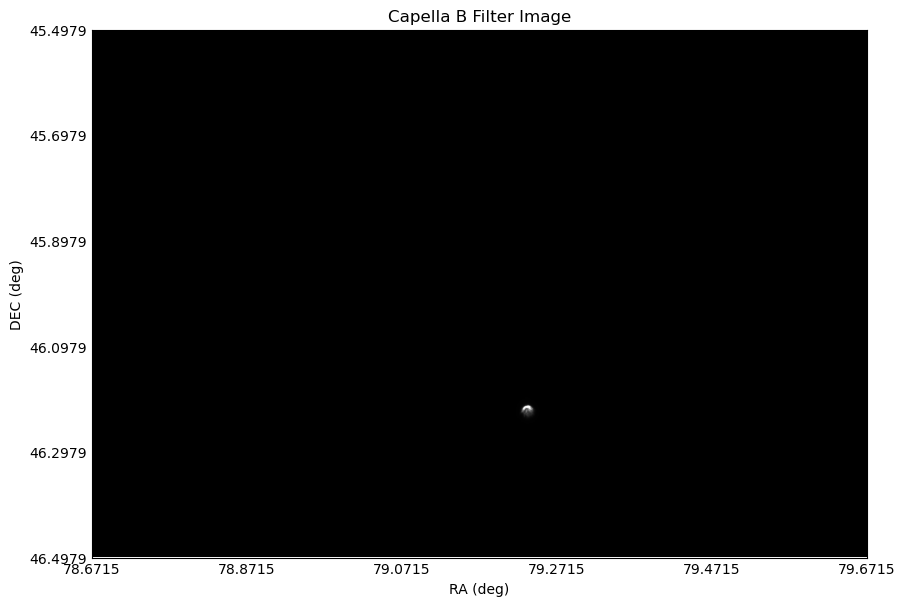

In [9]:
b_filter_files = [file for file in os.listdir(capella_path) if 'filter-B' in file]

image_stack = []

ra_center = 79.1715  
dec_center = 45.9979  
fov_x_deg = 1.0  
fov_y_deg = 1.0  

for file in b_filter_files:
    file_path = os.path.join(capella_path, file)
    with fits.open(file_path) as hdul:
        image_data = hdul[0].data
        image_stack.append(image_data)

image_stack = np.array(image_stack)

median_image = np.median(image_stack, axis=0)

fig, ax = plt.subplots(figsize=(10, 8))
ax.imshow(median_image, cmap='gray')
ax.set_title('Capella B Filter Image')

ax.set_xlabel('RA (deg)')
ax.set_ylabel('DEC (deg)')

x, y = np.meshgrid(np.arange(median_image.shape[1]), np.arange(median_image.shape[0]))

ra = ra_center - (fov_x_deg / median_image.shape[1]) * (x - median_image.shape[1] / 2)
dec = dec_center + (fov_y_deg / median_image.shape[0]) * (y - median_image.shape[0] / 2)

ax.set_xticks(np.linspace(0, median_image.shape[1], num=6))
ax.set_xticklabels(np.linspace(ra_center - fov_x_deg / 2, ra_center + fov_x_deg / 2, num=6).round(4))

ax.set_yticks(np.linspace(0, median_image.shape[0], num=6))
ax.set_yticklabels(np.linspace(dec_center - fov_y_deg / 2, dec_center + fov_y_deg / 2, num=6).round(4))

ax.tick_params(axis='both', which='both', length=0)

plt.show()

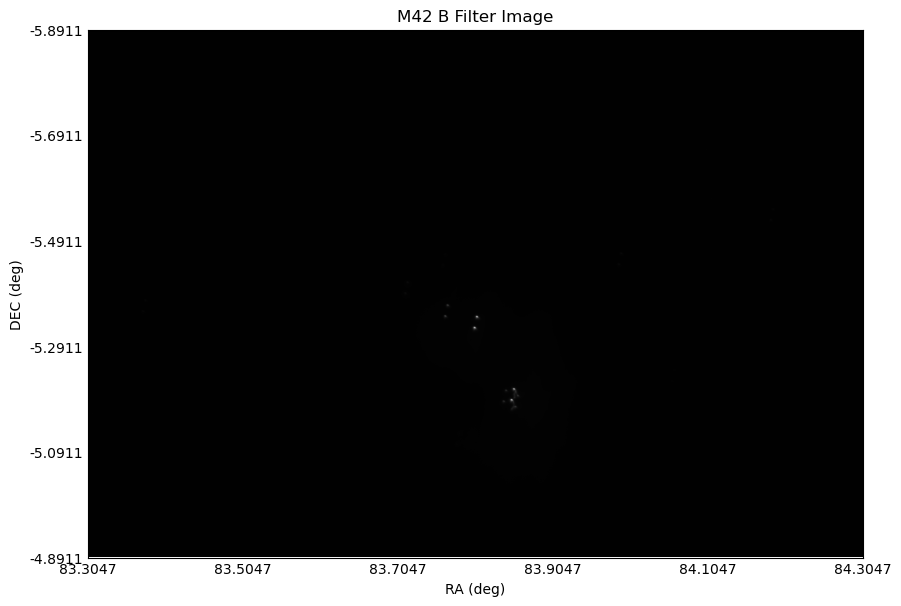

In [10]:
b_filter_files42 = [file for file in os.listdir(M42_path) if 'filter-B' in file]

image_stack = []

ra_center = 83.8047  
dec_center = -5.3911  
fov_x_deg = 1.0  
fov_y_deg = 1.0  

for file in b_filter_files42:
    file_path42 = os.path.join(M42_path, file)
    with fits.open(file_path42) as hdul:
        image_data42 = hdul[0].data
        image_stack.append(image_data42)

image_stack42 = np.array(image_stack)

median_image42 = np.median(image_stack42, axis=0)

fig, ax = plt.subplots(figsize=(10, 8))
ax.imshow(median_image42, cmap='gray')
ax.set_title('M42 B Filter Image')

ax.set_xlabel('RA (deg)')
ax.set_ylabel('DEC (deg)')

x, y = np.meshgrid(np.arange(median_image42.shape[1]), np.arange(median_image42.shape[0]))

ra = ra_center - (fov_x_deg / median_image42.shape[1]) * (x - median_image42.shape[1] / 2)
dec = dec_center + (fov_y_deg / median_image42.shape[0]) * (y - median_image42.shape[0] / 2)

ax.set_xticks(np.linspace(0, median_image42.shape[1], num=6))
ax.set_xticklabels(np.linspace(ra_center - fov_x_deg / 2, ra_center + fov_x_deg / 2, num=6).round(4))

ax.set_yticks(np.linspace(0, median_image42.shape[0], num=6))
ax.set_yticklabels(np.linspace(dec_center - fov_y_deg / 2, dec_center + fov_y_deg / 2, num=6).round(4))

ax.tick_params(axis='both', which='both', length=0)

plt.show()

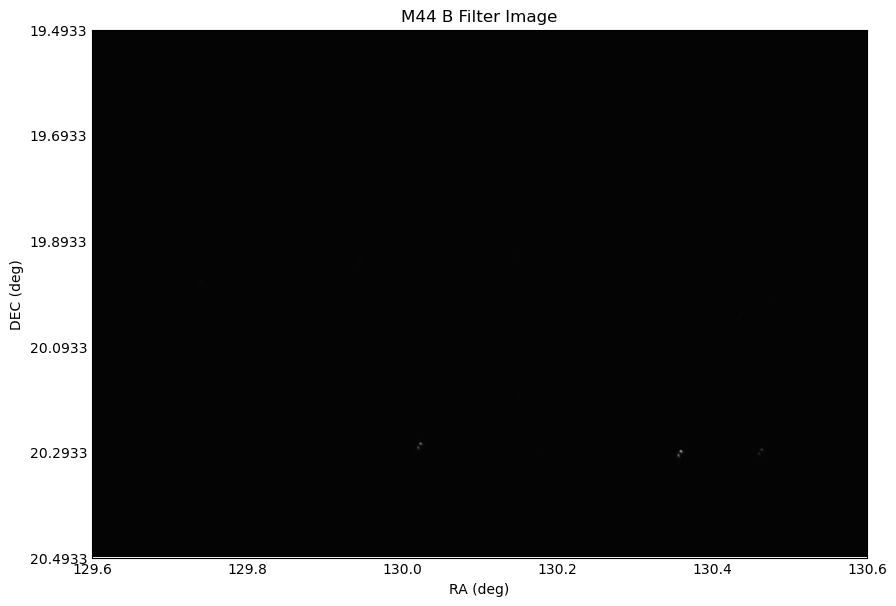

In [11]:
b_filter_files44 = [file for file in os.listdir(M44_path) if 'filter-B' in file]

image_stack = []

ra_center = 130.1  
dec_center = 19.9933
fov_x_deg = 1.0  
fov_y_deg = 1.0  

for file in b_filter_files44:
    file_path44 = os.path.join(M44_path, file)
    with fits.open(file_path44) as hdul:
        image_data44 = hdul[0].data
        image_stack.append(image_data44)

image_stack44 = np.array(image_stack)

median_image44 = np.median(image_stack44, axis=0)

fig, ax = plt.subplots(figsize=(10, 8))
ax.imshow(median_image44, cmap='gray')
ax.set_title('M44 B Filter Image')

ax.set_xlabel('RA (deg)')
ax.set_ylabel('DEC (deg)')

x, y = np.meshgrid(np.arange(median_image44.shape[1]), np.arange(median_image44.shape[0]))

ra = ra_center - (fov_x_deg / median_image44.shape[1]) * (x - median_image44.shape[1] / 2)
dec = dec_center + (fov_y_deg / median_image44.shape[0]) * (y - median_image44.shape[0] / 2)

ax.set_xticks(np.linspace(0, median_image44.shape[1], num=6))
ax.set_xticklabels(np.linspace(ra_center - fov_x_deg / 2, ra_center + fov_x_deg / 2, num=6).round(4))

ax.set_yticks(np.linspace(0, median_image44.shape[0], num=6))
ax.set_yticklabels(np.linspace(dec_center - fov_y_deg / 2, dec_center + fov_y_deg / 2, num=6).round(4))

ax.tick_params(axis='both', which='both', length=0)

plt.show()

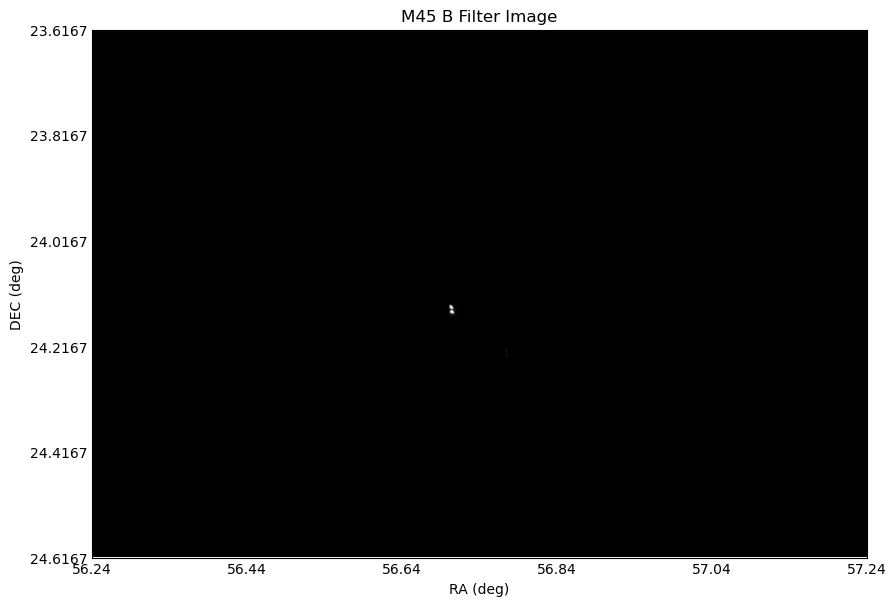

In [12]:
b_filter_files45 = [file for file in os.listdir(M45_path) if 'filter-B' in file]

image_stack = []

ra_center = 56.74  
dec_center = +24.1167
fov_x_deg = 1.0  
fov_y_deg = 1.0  

for file in b_filter_files45:
    file_path45 = os.path.join(M45_path, file)
    with fits.open(file_path45) as hdul:
        image_data45 = hdul[0].data
        image_stack.append(image_data45)

image_stack45 = np.array(image_stack)

median_image45 = np.median(image_stack45, axis=0)

fig, ax = plt.subplots(figsize=(10, 8))
ax.imshow(median_image45, cmap='gray')
ax.set_title('M45 B Filter Image')

ax.set_xlabel('RA (deg)')
ax.set_ylabel('DEC (deg)')

x, y = np.meshgrid(np.arange(median_image45.shape[1]), np.arange(median_image45.shape[0]))

ra = ra_center - (fov_x_deg / median_image45.shape[1]) * (x - median_image45.shape[1] / 2)
dec = dec_center + (fov_y_deg / median_image45.shape[0]) * (y - median_image45.shape[0] / 2)

ax.set_xticks(np.linspace(0, median_image45.shape[1], num=6))
ax.set_xticklabels(np.linspace(ra_center - fov_x_deg / 2, ra_center + fov_x_deg / 2, num=6).round(4))

ax.set_yticks(np.linspace(0, median_image45.shape[0], num=6))
ax.set_yticklabels(np.linspace(dec_center - fov_y_deg / 2, dec_center + fov_y_deg / 2, num=6).round(4))

ax.tick_params(axis='both', which='both', length=0)

plt.show()

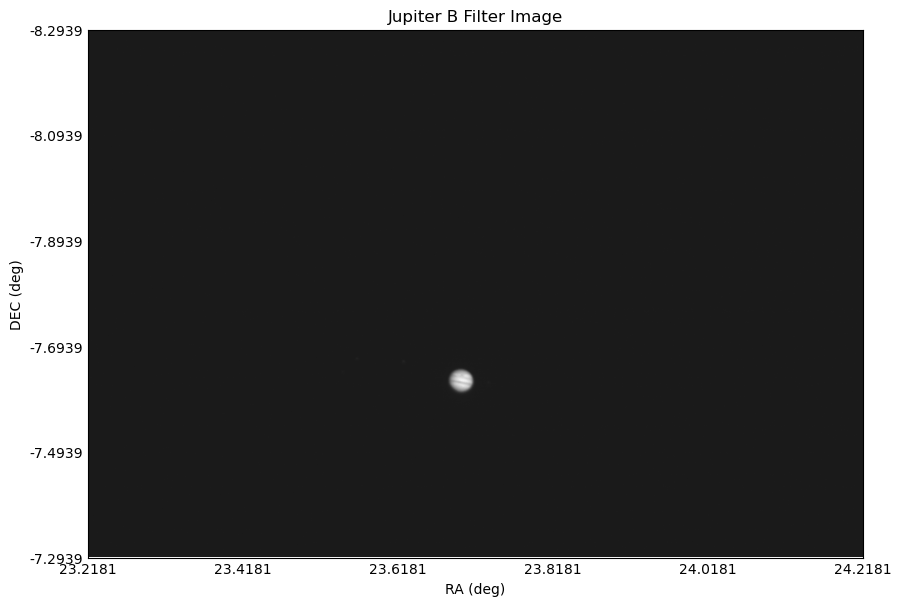

In [13]:
b_filter_filesJ = [file for file in os.listdir(jupiter_path) if 'filter-B' in file]

image_stack = []

ra_center = 23.7181
dec_center = -7.7939
fov_x_deg = 1.0  
fov_y_deg = 1.0  

for file in b_filter_filesJ:
    file_pathJ = os.path.join(jupiter_path, file)
    with fits.open(file_pathJ) as hdul:
        image_dataJ = hdul[0].data
        image_stack.append(image_dataJ)

image_stackJ = np.array(image_stack)

median_imageJ = np.median(image_stackJ, axis=0)

fig, ax = plt.subplots(figsize=(10, 8))
ax.imshow(median_imageJ, cmap='gray')
ax.set_title('Jupiter B Filter Image')

ax.set_xlabel('RA (deg)')
ax.set_ylabel('DEC (deg)')

x, y = np.meshgrid(np.arange(median_imageJ.shape[1]), np.arange(median_imageJ.shape[0]))

ra = ra_center - (fov_x_deg / median_imageJ.shape[1]) * (x - median_imageJ.shape[1] / 2)
dec = dec_center + (fov_y_deg / median_imageJ.shape[0]) * (y - median_imageJ.shape[0] / 2)

ax.set_xticks(np.linspace(0, median_imageJ.shape[1], num=6))
ax.set_xticklabels(np.linspace(ra_center - fov_x_deg / 2, ra_center + fov_x_deg / 2, num=6).round(4))

ax.set_yticks(np.linspace(0, median_imageJ.shape[0], num=6))
ax.set_yticklabels(np.linspace(dec_center - fov_y_deg / 2, dec_center + fov_y_deg / 2, num=6).round(4))

ax.tick_params(axis='both', which='both', length=0)

plt.show()

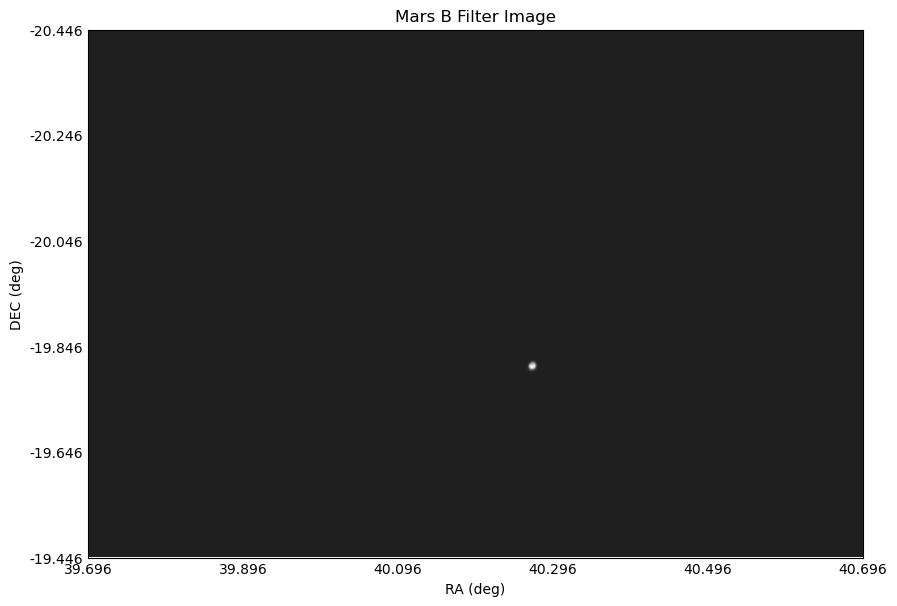

In [14]:

MARS_path = '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Mars-lab3'
b_filter_filesM = [file for file in os.listdir(MARS_path) if 'filter-B' in file]

image_stack = []

ra_center = 40.196
dec_center = -19.946
fov_x_deg = 1.0  
fov_y_deg = 1.0  

for file in b_filter_filesM:
    file_pathM = os.path.join(MARS_path, file)
    with fits.open(file_pathM) as hdul:
        image_dataM = hdul[0].data
        image_stack.append(image_dataM)

image_stackM = np.array(image_stack)

median_imageM = np.median(image_stackM, axis=0)

fig, ax = plt.subplots(figsize=(10, 8))
ax.imshow(median_imageM, cmap='gray')
ax.set_title('Mars B Filter Image')

ax.set_xlabel('RA (deg)')
ax.set_ylabel('DEC (deg)')

x, y = np.meshgrid(np.arange(median_imageM.shape[1]), np.arange(median_imageM.shape[0]))

ra = ra_center - (fov_x_deg / median_imageM.shape[1]) * (x - median_imageM.shape[1] / 2)
dec = dec_center + (fov_y_deg / median_imageM.shape[0]) * (y - median_imageM.shape[0] / 2)

ax.set_xticks(np.linspace(0, median_imageM.shape[1], num=6))
ax.set_xticklabels(np.linspace(ra_center - fov_x_deg / 2, ra_center + fov_x_deg / 2, num=6).round(4))

ax.set_yticks(np.linspace(0, median_imageM.shape[0], num=6))
ax.set_yticklabels(np.linspace(dec_center - fov_y_deg / 2, dec_center + fov_y_deg / 2, num=6).round(4))

ax.tick_params(axis='both', which='both', length=0)

plt.show()


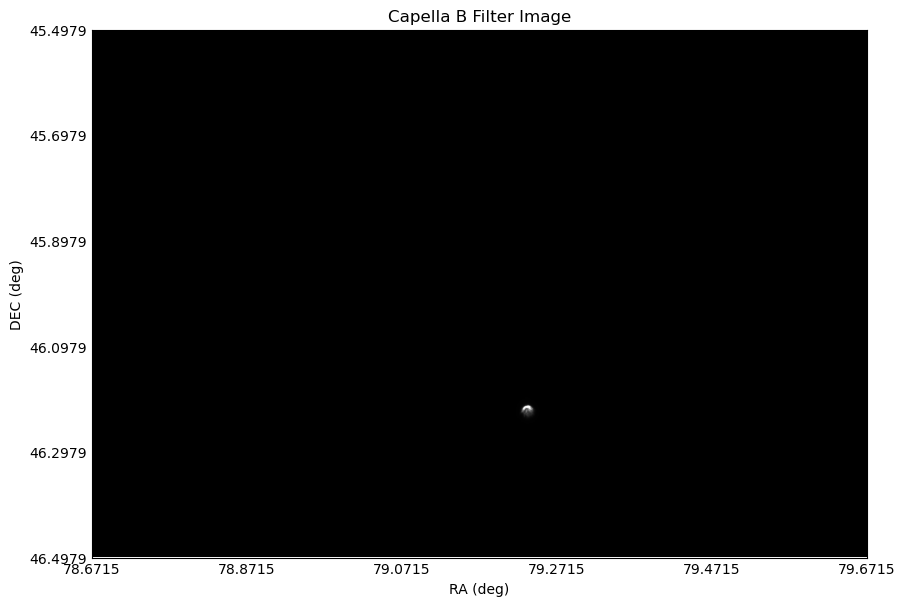

In [15]:
b_filter_files = [file for file in os.listdir(capella_path) if 'filter-B' in file]

image_stack = []

ra_center = 79.1715  
dec_center = 45.9979  
fov_x_deg = 1.0  
fov_y_deg = 1.0  

for file in b_filter_files:
    file_path = os.path.join(capella_path, file)
    with fits.open(file_path) as hdul:
        image_data = hdul[0].data
        image_stack.append(image_data)

image_stack = np.array(image_stack)

median_image = np.median(image_stack, axis=0)

fig, ax = plt.subplots(figsize=(10, 8))
ax.imshow(median_image, cmap='gray')
ax.set_title('Capella B Filter Image')

ax.set_xlabel('RA (deg)')
ax.set_ylabel('DEC (deg)')

x, y = np.meshgrid(np.arange(median_image.shape[1]), np.arange(median_image.shape[0]))

ra = ra_center - (fov_x_deg / median_image.shape[1]) * (x - median_image.shape[1] / 2)
dec = dec_center + (fov_y_deg / median_image.shape[0]) * (y - median_image.shape[0] / 2)

ax.set_xticks(np.linspace(0, median_image.shape[1], num=6))
ax.set_xticklabels(np.linspace(ra_center - fov_x_deg / 2, ra_center + fov_x_deg / 2, num=6).round(4))

ax.set_yticks(np.linspace(0, median_image.shape[0], num=6))
ax.set_yticklabels(np.linspace(dec_center - fov_y_deg / 2, dec_center + fov_y_deg / 2, num=6).round(4))

ax.tick_params(axis='both', which='both', length=0)

plt.show()

In [16]:
from astropy import coordinates, units
from astroplan import Observer
from astropy import units as u 
from astroplan import FixedTarget
from astropy.time import Time
from astroplan.plots import plot_finder_image
from astropy.coordinates import get_body
from astropy.time import Time

obs_time = Time('2025-02-17 21:00:00')

from astropy.utils import iers
iers.conf.IERS_A_URL = 'ftp://cddis.gsfc.nasa.gov/pub/products/iers/finals2000A.all'
iers.conf.IERS_A_URL_MIRROR = 'https://datacenter.iers.org/data/9/finals2000A.all'
from astroplan import download_IERS_A
download_IERS_A()

CTO = Observer(location=coordinates.EarthLocation(lat=29.643018, lon=-82.349004*u.deg, height=31*u.m),
               timezone='US/Eastern',
               name='University of Florida Campus Teaching Observatory',
              )
CTO

<Observer: name='University of Florida Campus Teaching Observatory',
    location (lon, lat, el)=(-82.34900399999998 deg, 29.643018 deg, 30.99999999900234 m),
    timezone=<DstTzInfo 'US/Eastern' LMT-1 day, 19:04:00 STD>>

In [17]:
capella_coord = coordinates.SkyCoord.from_name('Capella')
M42_coord = coordinates.SkyCoord.from_name('M42')
M44_coord = coordinates.SkyCoord.from_name('M44')
M45_coord = coordinates.SkyCoord.from_name('M45')
Jupiter_coord = get_body('jupiter', obs_time)
Mars_coord = get_body('mars', obs_time)

In [18]:
capella_target = FixedTarget(capella_coord, name="Capella")
M42_target = FixedTarget(M42_coord, name="M42")
M44_target = FixedTarget(M44_coord, name="M44")
M45_target = FixedTarget(M45_coord, name="M45")
Mars_target = FixedTarget(Mars_coord, name="Mars")
Jupiter_target = FixedTarget(Jupiter_coord, name="Jupiter")

capella_target, M42_target, M45_target, Mars_target, Jupiter_target

(<FixedTarget "Capella" at SkyCoord (ICRS): (ra, dec) in deg (79.17232794, 45.99799147)>,
 <FixedTarget "M42" at SkyCoord (ICRS): (ra, dec) in deg (83.8201, -5.3876)>,
 <FixedTarget "M45" at SkyCoord (ICRS): (ra, dec) in deg (56.601, 24.114)>,
 <FixedTarget "Mars" at SkyCoord (GCRS: obstime=2025-02-17 21:00:00.000, obsgeoloc=(0., 0., 0.) m, obsgeovel=(0., 0., 0.) m / s): (ra, dec, distance) in (deg, deg, AU) (108.86492671, 26.21045433, 0.77872855)>,
 <FixedTarget "Jupiter" at SkyCoord (GCRS: obstime=2025-02-17 21:00:00.000, obsgeoloc=(0., 0., 0.) m, obsgeovel=(0., 0., 0.) m / s): (ra, dec, distance) in (deg, deg, AU) (69.74144616, 21.69330967, 4.7984481)>)

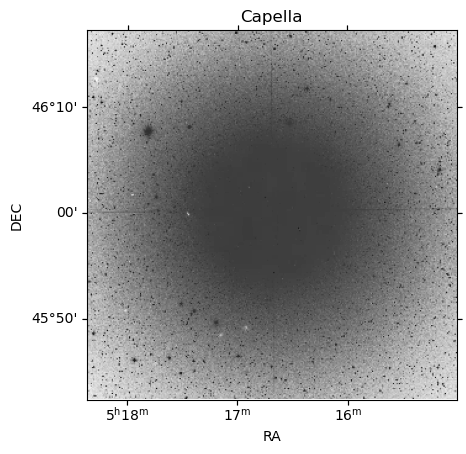

In [19]:
ax, hdu = plot_finder_image(capella_target, survey='DSS', fov_radius=35*u.arcmin)

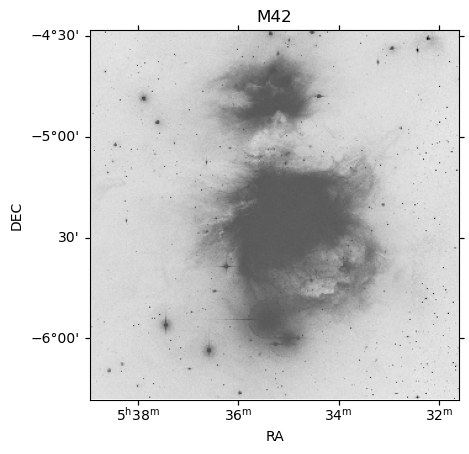

In [20]:
ax, hdu = plot_finder_image(M42_target, survey='DSS', fov_radius=110*u.arcmin)

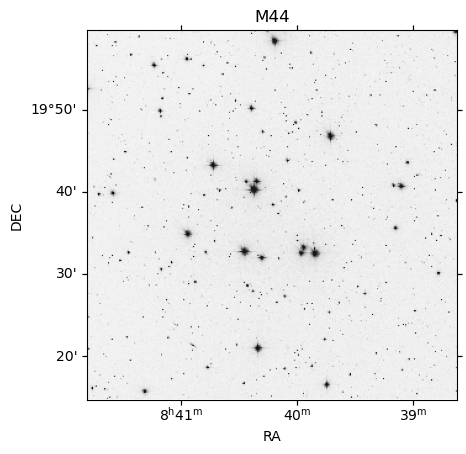

In [21]:
ax, hdu = plot_finder_image(M44_target, survey='DSS', fov_radius=45*u.arcmin)

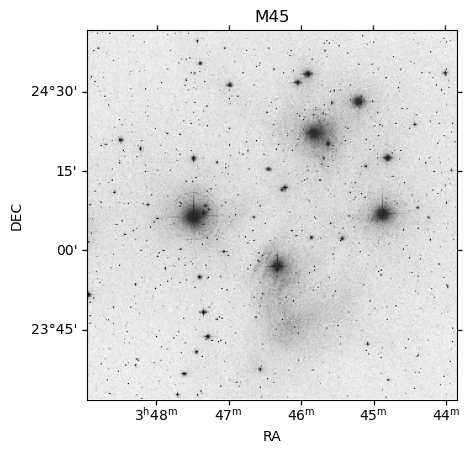

In [22]:
ax, hdu = plot_finder_image(M45_target, survey='DSS', fov_radius=70*u.arcmin)

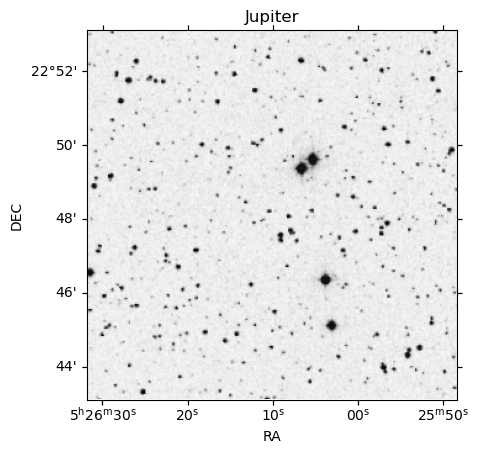

In [23]:
ax, hdu = plot_finder_image(Jupiter_target, survey='DSS', fov_radius=10*u.arcmin)

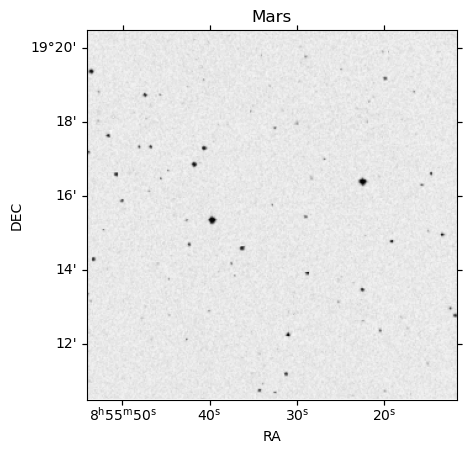

In [24]:
ax, hdu = plot_finder_image(Mars_target, survey='DSS', fov_radius=10*u.arcmin)

<PolarAxes: >

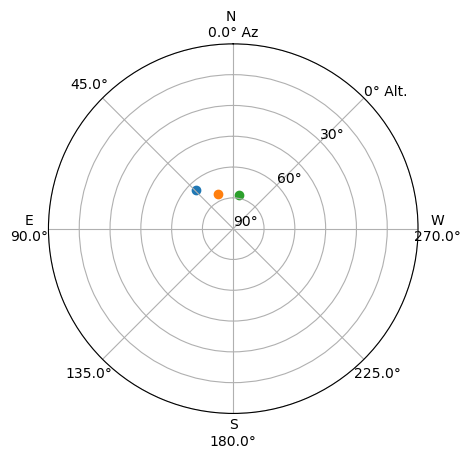

In [25]:
date = '2025-02-17' 
now = Time(date)

sunset = CTO.sun_set_time(now)
onehour_after_sunset = sunset + 1*u.hour
twohours_after_sunset = sunset + 2*u.hour

target = [capella_target]

plot_sky(target=target, observer=CTO, time=sunset)
plot_sky(target=target, observer=CTO, time=onehour_after_sunset)
plot_sky(target=target, observer=CTO, time=twohours_after_sunset)

<PolarAxes: >

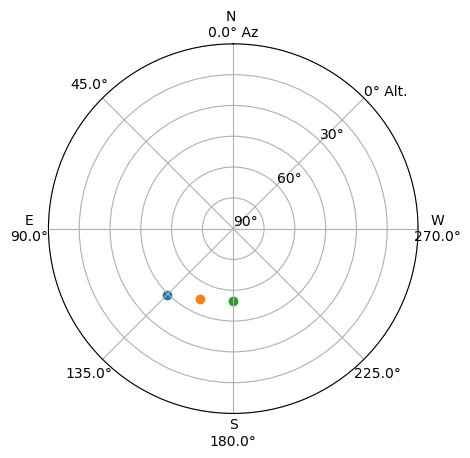

In [26]:
date = '2025-02-17' 
now = Time(date)

sunset = CTO.sun_set_time(now)
onehour_after_sunset = sunset + 1*u.hour
twohours_after_sunset = sunset + 2*u.hour

target = [M42_target]

plot_sky(target=target, observer=CTO, time=sunset)
plot_sky(target=target, observer=CTO, time=onehour_after_sunset)
plot_sky(target=target, observer=CTO, time=twohours_after_sunset)

<PolarAxes: >

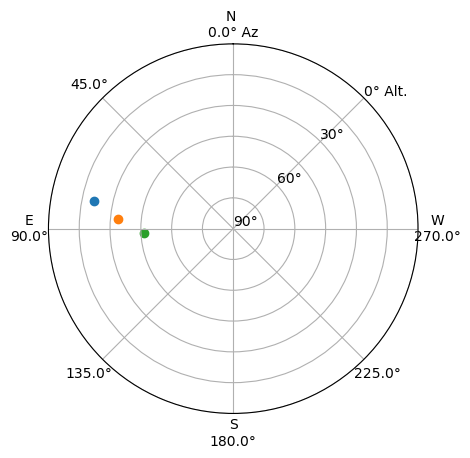

In [27]:
date = '2025-02-17' 
now = Time(date)

sunset = CTO.sun_set_time(now)
onehour_after_sunset = sunset + 1*u.hour
twohours_after_sunset = sunset + 2*u.hour

target = [M44_target]

plot_sky(target=target, observer=CTO, time=sunset)
plot_sky(target=target, observer=CTO, time=onehour_after_sunset)
plot_sky(target=target, observer=CTO, time=twohours_after_sunset)

<PolarAxes: >

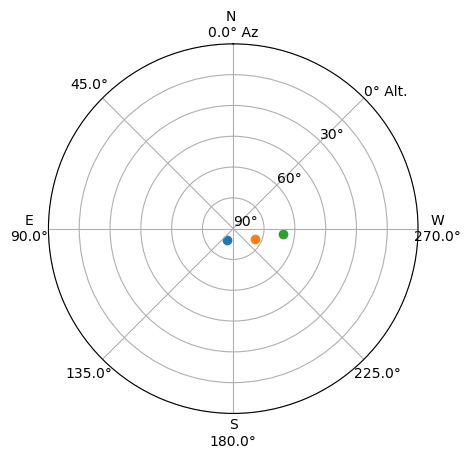

In [28]:
date = '2025-02-17' 
now = Time(date)

sunset = CTO.sun_set_time(now)
onehour_after_sunset = sunset + 1*u.hour
twohours_after_sunset = sunset + 2*u.hour

target = [M45_target]

plot_sky(target=target, observer=CTO, time=sunset)
plot_sky(target=target, observer=CTO, time=onehour_after_sunset)
plot_sky(target=target, observer=CTO, time=twohours_after_sunset)

<PolarAxes: >

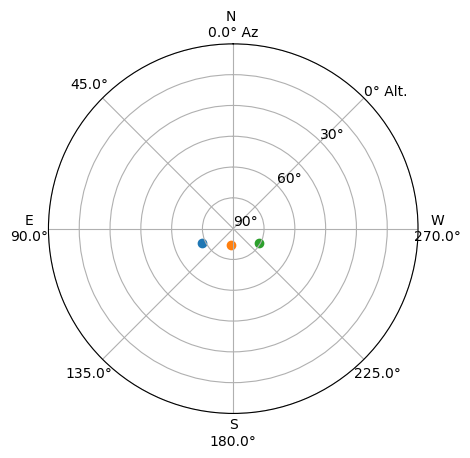

In [29]:
date = '2025-02-17' 
now = Time(date)

sunset = CTO.sun_set_time(now)
onehour_after_sunset = sunset + 1*u.hour
twohours_after_sunset = sunset + 2*u.hour

target = [Jupiter_target]

plot_sky(target=target, observer=CTO, time=sunset)
plot_sky(target=target, observer=CTO, time=onehour_after_sunset)
plot_sky(target=target, observer=CTO, time=twohours_after_sunset)

<PolarAxes: >

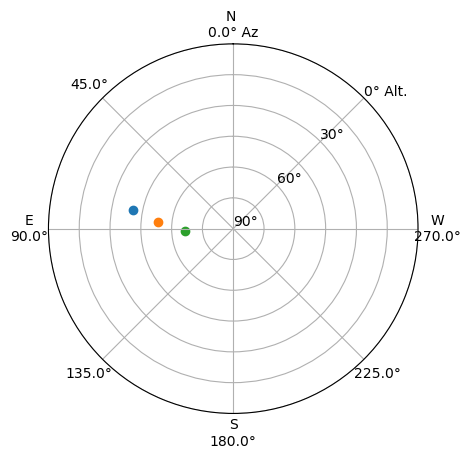

In [30]:
date = '2025-02-17' 
now = Time(date)

sunset = CTO.sun_set_time(now)
onehour_after_sunset = sunset + 1*u.hour
twohours_after_sunset = sunset + 2*u.hour

target = [Mars_target]

plot_sky(target=target, observer=CTO, time=sunset)
plot_sky(target=target, observer=CTO, time=onehour_after_sunset)
plot_sky(target=target, observer=CTO, time=twohours_after_sunset)

In [31]:
flat_path = '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/flat-lab3'

flats_in_folder = os.listdir(flat_path)

for flat in flats_in_folder:
    print(flat)


Flat_darks_0.2sec_Bin2_filter-Clear_-4.9C_gain0_2025-02-17_180705_frame0001.fit
Flat_darks_0.2sec_Bin2_filter-Clear_-5.3C_gain0_2025-02-17_180707_frame0003.fit
Flat_darks_0.75sec_Bin2_filter-R_-5.3C_gain0_2025-02-17_180514_frame0001.fit
Flat_darks_0.25sec_Bin2_filter-B_-5.3C_gain0_2025-02-17_175927_frame0001.fit
Flat_darks_0.4sec_Bin2_filter-V_-5.3C_gain0_2025-02-17_180100_frame0001.fit
Flat_darks_0.75sec_Bin2_filter-R_-5.3C_gain0_2025-02-17_180517_frame0003.fit
Flat_darks_15sec_Bin2_filter-I_-4.9C_gain0_2025-02-17_180247_frame0001.fit
Flat_darks_0.75sec_Bin2_filter-R_-5.3C_gain0_2025-02-17_180516_frame0002.fit
Flat_darks_0.4sec_Bin2_filter-V_-5.3C_gain0_2025-02-17_180102_frame0003.fit
Flat_darks_0.4sec_Bin2_filter-V_-5.3C_gain0_2025-02-17_180101_frame0002.fit
Flat_darks_15sec_Bin2_filter-I_-5.3C_gain0_2025-02-17_180303_frame0002.fit
Flat_darks_0.2sec_Bin2_filter-Clear_-5.3C_gain0_2025-02-17_180706_frame0002.fit
Flat_darks_0.25sec_Bin2_filter-B_-5.3C_gain0_2025-02-17_175928_frame0003.f

In [32]:
color_files = {'V': [], 'Clear': [], 'B': [], 'I': [], 'R': []}
fits_files = [f for f in flats_in_folder if f.endswith('.fit')]

#goes through each file with a color 'letter' like V in the files above
for fits_file in fits_files:
    if 'V' in fits_file:
        color_files['V'].append(fits_file)
    elif 'Clear' in fits_file:
        color_files['Clear'].append(fits_file)
    elif 'B' in fits_file:
        color_files['B'].append(fits_file)
    elif 'I' in fits_file:
        color_files['I'].append(fits_file)
    elif 'R' in fits_file:
        color_files['R'].append(fits_file)

average_flats = {}
#this creates a list of the color's data and gets the average of the data and then average of the 
#flat's specifically

for color, files in color_files.items():
    if files:
        data_list = []
        for fits_file in files:
            file_path = os.path.join(flat_path, fits_file)
            data = fits.getdata(file_path)  
            data_list.append(data)
        
        average_flat = np.mean(data_list, axis=0)
        average_flats[color] = average_flat
        
    avg_value = np.mean(average_flat)
    print("Average value for (without bias subtracted)", color, ":", avg_value)

Average value for (without bias subtracted) V : 38730.53387339958
Average value for (without bias subtracted) Clear : 45296.415911317374
Average value for (without bias subtracted) B : 40580.232261394696
Average value for (without bias subtracted) I : 40580.232261394696
Average value for (without bias subtracted) R : 40580.232261394696


In [33]:
bias_path = '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/bias-lab3'


bias_in_folder = os.listdir(bias_path)
bias_files = [f for f in bias_in_folder if f.endswith('.fit')]


for bias in bias_files:
    print(bias)


Bias_darks_0sec_Bin2_filter-Clear_-4.4C_gain0_2025-02-17_175639_frame0009.fit
Bias_darks_0sec_Bin2_filter-Clear_-4.4C_gain0_2025-02-17_175638_frame0007.fit
Bias_darks_0sec_Bin2_filter-Clear_-4.4C_gain0_2025-02-17_175636_frame0004.fit
Bias_darks_0sec_Bin2_filter-Clear_-4.4C_gain0_2025-02-17_175635_frame0001.fit
Bias_darks_0sec_Bin2_filter-Clear_-4.4C_gain0_2025-02-17_175635_frame0002.fit
Bias_darks_0sec_Bin2_filter-Clear_-4.4C_gain0_2025-02-17_175636_frame0003.fit
Bias_darks_0sec_Bin2_filter-Clear_-4.4C_gain0_2025-02-17_175637_frame0005.fit
Bias_darks_0sec_Bin2_filter-Clear_-4.4C_gain0_2025-02-17_175637_frame0006.fit
Bias_darks_0sec_Bin2_filter-Clear_-4.4C_gain0_2025-02-17_175638_frame0008.fit
Bias_darks_0sec_Bin2_filter-Clear_-4.4C_gain0_2025-02-17_175639_frame0010.fit


In [34]:
bias_data_list = []
for bias in bias_files:
    file_path = os.path.join(bias_path, bias)  
    bias_data = fits.getdata(file_path)  
    bias_data_list.append(bias_data)


median_bias = np.median(bias_data_list, axis=0)

In [35]:
average_flats_bias = {}

for color, files in color_files.items():
    if files:
        data_list = []
        for fits_file in files:
            file_path = os.path.join(flat_path, fits_file) 
            data = fits.getdata(file_path)  
            data_list.append(data)
        
    
        average_flat = np.mean(data_list, axis=0)
        
        average_flat_bias = average_flat - median_bias
        average_flats_bias[color] = average_flat_bias
        
    avg_value = np.mean(average_flat_bias)
    print(f"Average value for {color} (with bias subtracted): {avg_value}")

Average value for V (with bias subtracted): 36811.48636625769
Average value for Clear (with bias subtracted): 43377.36840417548
Average value for B (with bias subtracted): 38661.1847542528
Average value for I (with bias subtracted): 38661.1847542528
Average value for R (with bias subtracted): 38661.1847542528


In [36]:
darks_path = '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/darks-lab3'

darks_in_folder = os.listdir(darks_path)

for darks in darks_in_folder:
    print(darks)

Light_darks_30sec_Bin2_filter-Clear_-5.8C_gain0_2025-02-17_202608_frame0003.fit
Dark_darks_1sec_Bin2_filter-Clear_-5.8C_gain0_2025-02-17_174935_frame0001.fit
Light_darks_10sec_Bin2_filter-Clear_-4.9C_gain0_2025-02-17_205726_frame0001.fit
Light_darks_1sec_Bin2_filter-Clear_-4.9C_gain0_2025-02-17_194054_frame0002.fit
Dark_darks_1sec_Bin2_filter-Clear_-5.3C_gain0_2025-02-17_174937_frame0002.fit
Dark_darks_20sec_Bin2_filter-Clear_-5.3C_gain0_2025-02-17_210818_frame0002.fit
Light_darks_10sec_Bin2_filter-Clear_-4.9C_gain0_2025-02-17_205736_frame0002.fit
Light_darks_30sec_Bin2_filter-Clear_-5.3C_gain0_2025-02-17_202506_frame0001.fit
Dark_darks_1sec_Bin2_filter-Clear_-5.8C_gain0_2025-02-17_174938_frame0003.fit
Light_darks_1sec_Bin2_filter-Clear_-4.9C_gain0_2025-02-17_194055_frame0003.fit
Dark_darks_20sec_Bin2_filter-Clear_-5.3C_gain0_2025-02-17_210757_frame0001.fit
Dark_darks_10sec_Bin2_filter-Clear_-5.3C_gain0_2025-02-17_174951_frame0001.fit
Dark_darks_10sec_Bin2_filter-Clear_-5.3C_gain0_2025

In [37]:
exp_files = {'30sec': [], '1sec': [], '20sec': [], '0.01sec': [], '10sec': []}
fits_files = [f for f in darks_in_folder if f.endswith('.fit')]

for fits_file in fits_files:
    if '30sec' in fits_file:
        exp_files['30sec'].append(fits_file)
    elif '1sec' in fits_file:
        exp_files['1sec'].append(fits_file)
    elif '20sec' in fits_file:
        exp_files['20sec'].append(fits_file)
    elif '0.01sec' in fits_file:
        exp_files['0.01sec'].append(fits_file)
    elif '10sec' in fits_file:
        exp_files['10sec'].append(fits_file)

average_darks_bias = {}

for exp, files in exp_files.items():
    if files:
        data_list = []
        for fits_file in files:
            file_path = os.path.join(darks_path, fits_file)
            data = fits.getdata(file_path)
            data_list.append(data)

        average_darks = np.mean(data_list, axis=0)

        average_darks_bias[exp] = average_darks - median_bias
        darksavg_value = np.mean(average_darks_bias[exp])

    print(f"Average value for {exp} (with bias subtracted): {darksavg_value}")


Average value for 30sec (with bias subtracted): 276.3044962612201
Average value for 1sec (with bias subtracted): 52.610560656206474
Average value for 20sec (with bias subtracted): 1.224698190901238
Average value for 0.01sec (with bias subtracted): 1.224698190901238
Average value for 10sec (with bias subtracted): 709.5381164334831
